In [78]:
# importing the libraries we used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


In [79]:
#Load the Dataset
data = pd.read_csv("/content/Gurgaon_RealEstate.csv")
#display the first few rows of a DataFrame
data.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


TASK 1

In [80]:
#to count the number of missing values in each column
data.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1105
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [81]:
# Describing the data

# basic statistics of data
print('Basic Statistics of the given data')
print(data.describe())
print('-----------------------------x-------------------------')
# data types
print('data types of the given data ')
print(data.dtypes)
print('-----------------------------x-------------------------')
# getting the features names
print('data columns of the given data')
print(data.columns)


Basic Statistics of the given data
             price  price_per_sqft           area      bedRoom     bathroom  \
count  3785.000000     3785.000000    3785.000000  3803.000000  3803.000000   
mean      2.505804    13800.167768    2845.999472     3.338154     3.405469   
std       2.950121    23052.005585   22783.349053     1.876734     1.930456   
min       0.070000        4.000000      50.000000     1.000000     1.000000   
25%       0.940000     6808.000000    1220.000000     2.000000     2.000000   
50%       1.500000     9000.000000    1725.000000     3.000000     3.000000   
75%       2.700000    13765.000000    2295.000000     4.000000     4.000000   
max      31.500000   600000.000000  875000.000000    21.000000    21.000000   

          floorNum  super_built_up_area  built_up_area    carpet_area  \
count  3784.000000          1915.000000    1733.000000    1944.000000   
mean      6.810254          1921.658251    2360.241413    2483.466943   
std       6.027555           767.1

In [82]:
#checking for duplicates
print('Duplicates sum in the data')

print(data.duplicated().sum())

Duplicates sum in the data
126


In [83]:
# removing duplicates
updData = data.drop_duplicates()

# checking
updData.duplicated().sum()

0

property_type
flat     2818
house     859
Name: count, dtype: int64


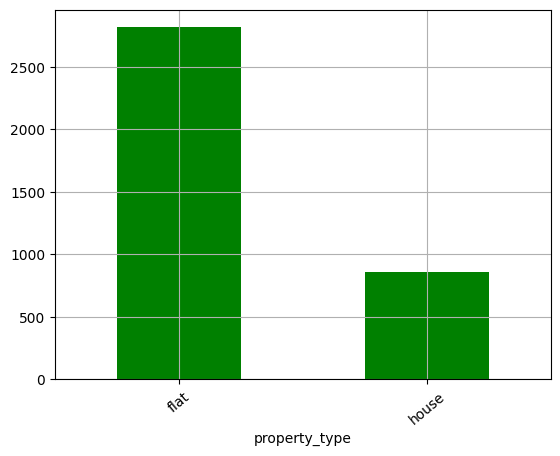

In [84]:
import matplotlib.pyplot as plt
#exploring the property type column
property_type_counts = updData['property_type'].value_counts()
print(property_type_counts)

#showing the bar plot of property_type column
updData.property_type.value_counts().plot(kind = 'bar',grid='true', color='Green')
plt.xticks(rotation=40)
plt.show()


In [85]:
# exploring the society column

# Assuming updData is your DataFrame
society = updData[['society','property_type']]



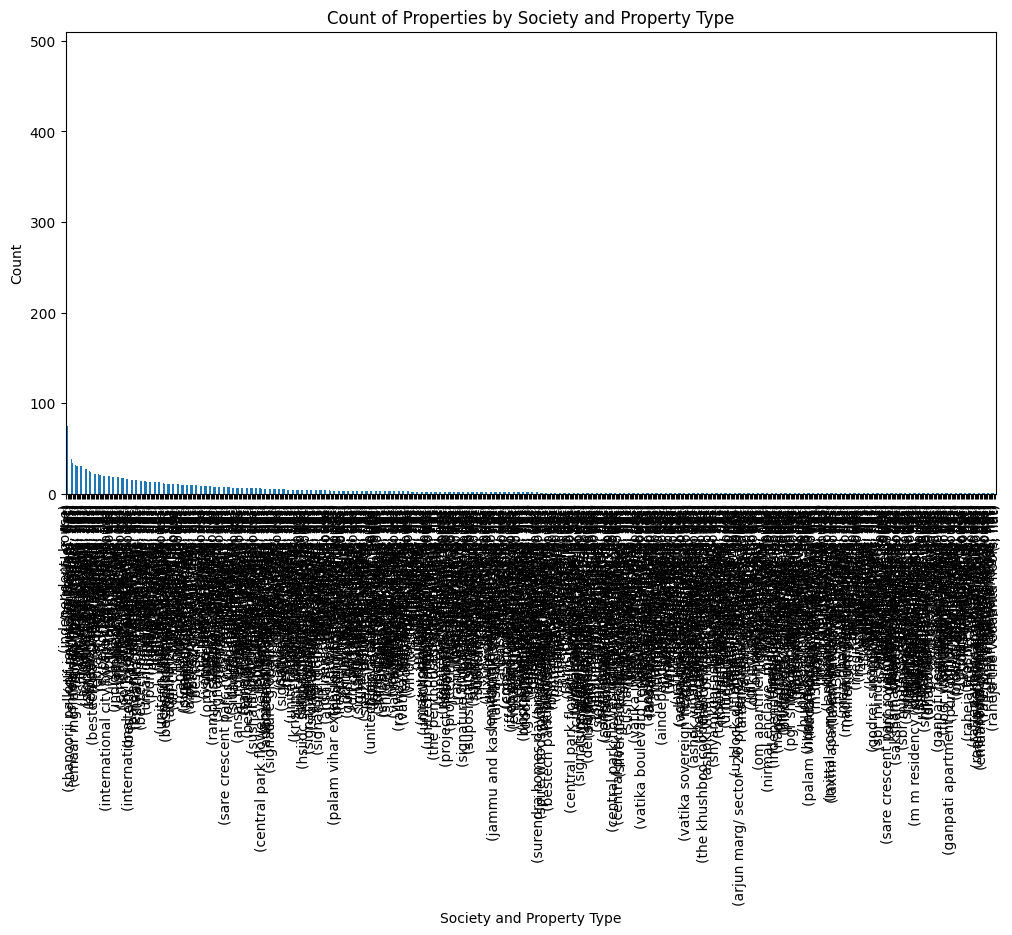

In [86]:
# Plotting
plt.figure(figsize=(12, 6))
society.value_counts().plot(kind='bar')

# Adding labels and title
plt.xlabel('Society and Property Type')
plt.ylabel('Count')
plt.title('Count of Properties by Society and Property Type')

# Show the plot
plt.show()

In [87]:
# exploring the price, price_per_sqft and few other columns
price = updData['price']
cost= updData['price_per_sqft']
bathroom = updData['bathroom']
bedroom = updData['bedRoom']
AREA = updData['area']

print('Below is the description of statistics of price column:')
print(price.describe())
print('null values(price)')
print(price.isnull().sum())
print('-------------------------------------------x-------------------------------')
print('Below is the description of statistics of cost column:')
print(cost.describe())
print('null values(cost)')
print(cost.isnull().sum())
print('-------------------------------------------x-------------------------------')
print('Below is the description of statistics of bathroom column:')
print(bathroom.describe())
print('null values(bathroom)')
print(bathroom.isnull().sum())
print('-------------------------------------------x-------------------------------')
print('Below is the description of statistics of bedroom column:')
print(bedroom.describe())
print('null values(bedroom)')
print(bedroom.isnull().sum())
print('-------------------------------------------x-------------------------------')
print('Below is the description of statistics of AREA column:')
print(AREA.describe())
print('null values(AREA)')
print(AREA.isnull().sum())


Below is the description of statistics of price column:
count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64
null values(price)
17
-------------------------------------------x-------------------------------
Below is the description of statistics of cost column:
count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64
null values(cost)
17
-------------------------------------------x-------------------------------
Below is the description of statistics of bathroom column:
count    3677.000000
mean        3.424531
std         1.948068
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bathroom, dtype: float64
null values(bathroo

Text(0.5, 1.0, 'Histogram for Price')

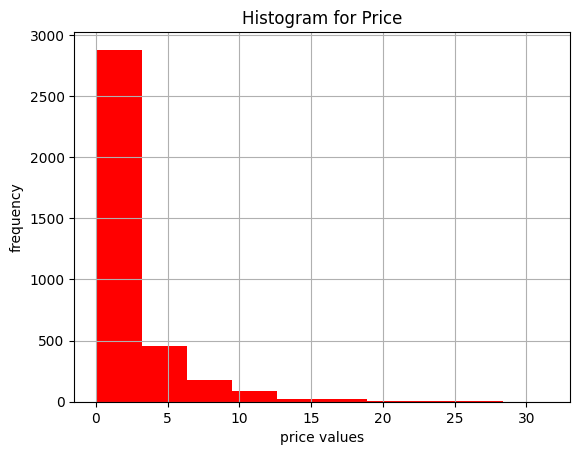

In [88]:
#Histogram for price

colors = ['Red']
price.hist(color=colors)
plt.xlabel('price values')
plt.ylabel('frequency')
plt.title('Histogram for Price')

Text(0.5, 1.0, 'Histogram for price_per_sqft ')

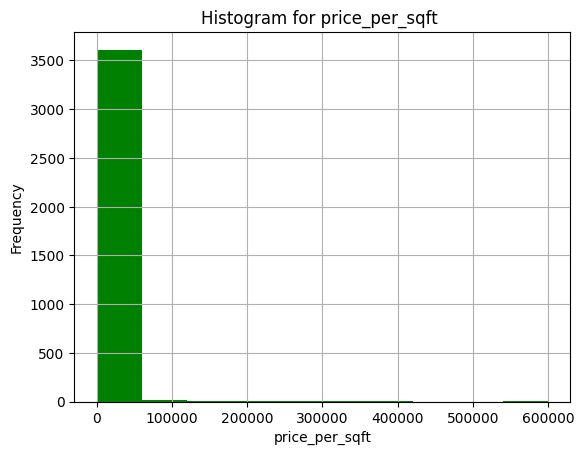

In [89]:
#histogram for cost
colors = ['green']
cost.hist(color=colors)
plt.xlabel('price_per_sqft')
plt.ylabel('Frequency')
plt.title('Histogram for price_per_sqft ')


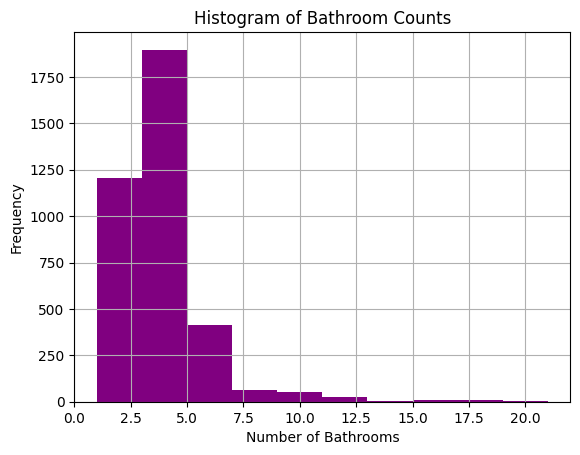

In [90]:
#Histogram for bathroom
colors = ['purple']
bathroom.hist(color=colors)


# Set the title and labels
plt.title('Histogram of Bathroom Counts')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.show()

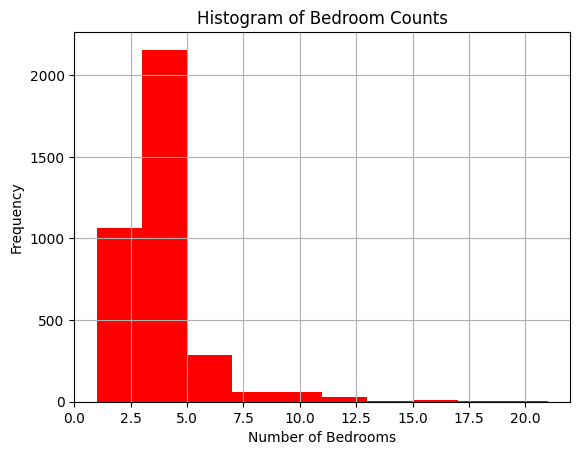

In [91]:
#Histogram for Bedroom
colors = ['Red']
bedroom.hist(color=colors)

# Set the title and labels
plt.title('Histogram of Bedroom Counts')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

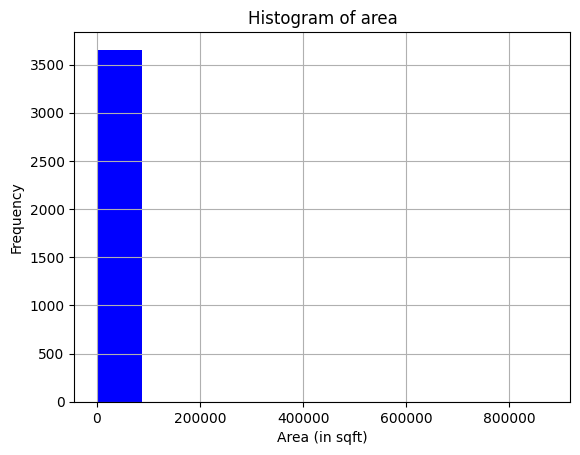

In [92]:
#Histogram for AREA
colors = ['Blue']
AREA.hist(color=colors)

# Set the title and labels
plt.title('Histogram of area')
plt.xlabel('Area (in sqft)')
plt.ylabel('Frequency')
plt.show()

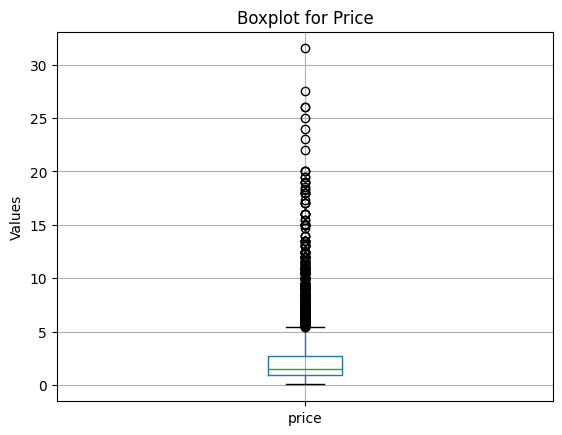

In [93]:
# Box plot for Price

price_data = pd.DataFrame(price)
price_data.boxplot()


plt.ylabel('Values')
plt.title('Boxplot for Price')
plt.show()

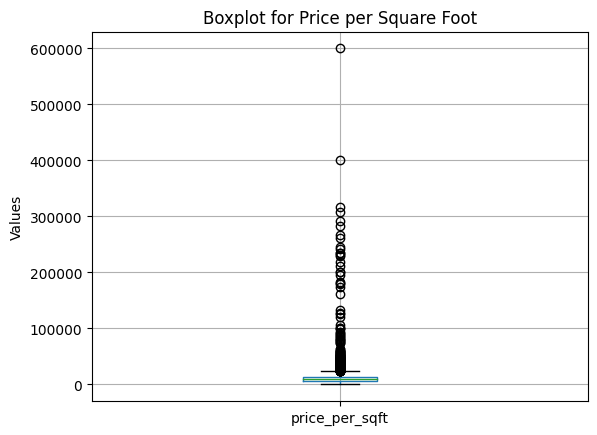

In [94]:
# boxplot for Price per Square Foot
cost_data = pd.DataFrame(cost)

cost_data.boxplot()
plt.ylabel('Values')
plt.title('Boxplot for Price per Square Foot')
plt.show()

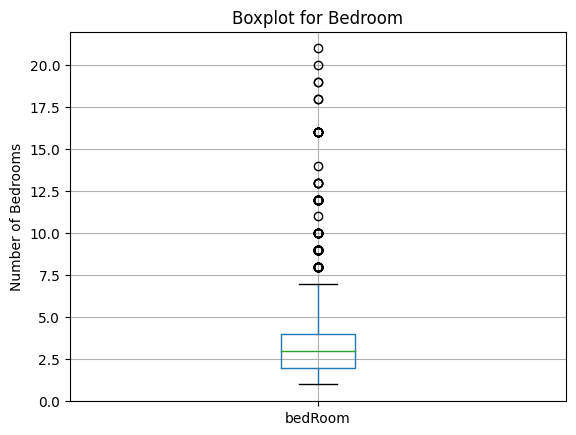

In [95]:
#Boxplot for Bedroom
bedroom_data = pd.DataFrame(updData['bedRoom'])
bedroom_data.boxplot()
plt.ylabel('Number of Bedrooms')
plt.title('Boxplot for Bedroom')
plt.show()

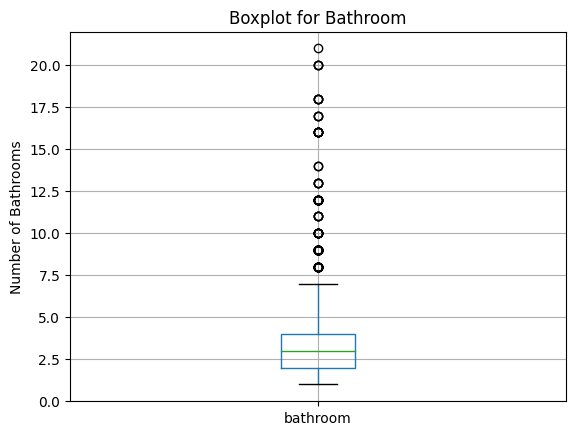

In [96]:
# Boxplot for Bathroom
bathroom_data = pd.DataFrame(updData['bathroom'])
bathroom_data.boxplot()
plt.ylabel('Number of Bathrooms')
plt.title('Boxplot for Bathroom')
plt.show()

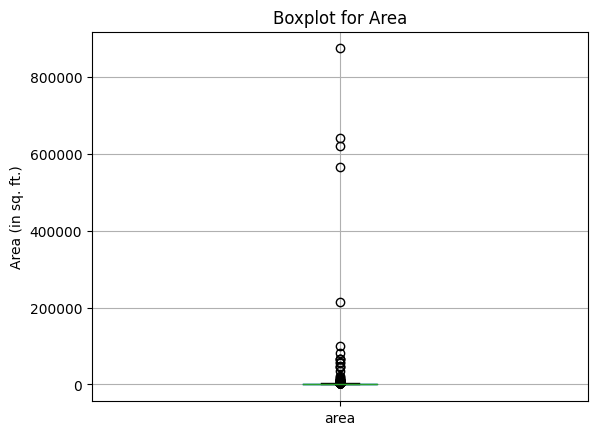

In [97]:
# Boxplot for Area
area_data = pd.DataFrame(updData['area'])
area_data.boxplot()
plt.ylabel('Area (in sq. ft.)')
plt.title('Boxplot for Area')
plt.show()

In [98]:
#Updated data
updData

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,flat,pivotal devaan,sector 84,0.37,6346.0,583.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2,2,1,...,583.0,NaN,483.0,0,0,0,0,0,0,73
3799,house,international city by sobha phase 1,sector 109,6.00,9634.0,6228.0,Plot area 692(578.6 sq.m.),5,5,3+,...,NaN,6228.0,NaN,1,1,1,1,0,0,160
3800,flat,ansal api celebrity suites,sector 2,0.60,8163.0,735.0,Super Built up area 735(68.28 sq.m.),1,1,1,...,735.0,NaN,NaN,0,0,0,0,0,1,67
3801,house,independent,sector 43,15.50,28233.0,5490.0,Plot area 610(510.04 sq.m.),5,6,3,...,NaN,5490.0,NaN,1,1,1,1,0,0,76


In [99]:
# using frequency bins to reduce cardinality in prices and price_per_sqft columns
updData['price_bin'] = pd.qcut(updData['price'], q=15)
updData['price_per_sqft_bin'] = pd.qcut(updData['price_per_sqft'], q=15)
updData['bathroom_bin'] = pd.qcut(updData['bathroom'], q=15, duplicates='drop')
updData['area_bin'] = pd.qcut(updData['area'], q=15)


<ipython-input-99-cf64ca06d259>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updData['price_bin'] = pd.qcut(updData['price'], q=15)
<ipython-input-99-cf64ca06d259>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updData['price_per_sqft_bin'] = pd.qcut(updData['price_per_sqft'], q=15)
<ipython-input-99-cf64ca06d259>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [100]:
# Grouping by price bins and calculating skewness and kurtosis
from scipy.stats import skew, kurtosis
price_stats = updData.groupby('price_bin').agg({'price': [skew, kurtosis]})
price_per_sqft_stats = updData.groupby('price_per_sqft_bin').agg({'price_per_sqft': [skew, kurtosis]})
area_stats = updData.groupby('area_bin').agg({'area': [skew, kurtosis]})
bathroom_stats= updData.groupby('bathroom_bin').agg({'bathroom': [skew, kurtosis]})


print("Price Skewness and Kurtosis:")
print(price_stats)
print('-------------------------------------------x-------------------------------')
print("\nPrice per Sqft Skewness and Kurtosis:")
print(price_per_sqft_stats)
print('-------------------------------------------x-------------------------------')
print("\n Area Skewness and Kurtosis:")
print(area_stats)
print('-------------------------------------------x-------------------------------')
print("bathroom Skewness and Kurtosis:")
print(bathroom_stats)



Price Skewness and Kurtosis:
                  price          
                   skew  kurtosis
price_bin                        
(0.069, 0.41] -0.482448 -0.312525
(0.41, 0.649]  0.137687 -1.120286
(0.649, 0.84] -0.097442 -1.238208
(0.84, 0.97]  -0.008978 -1.216111
(0.97, 1.15]  -0.084800 -1.357491
(1.15, 1.3]   -0.116959 -1.120521
(1.3, 1.445]  -0.155998 -0.963668
(1.445, 1.63]  0.064360 -1.159860
(1.63, 1.82]  -0.040222 -1.250946
(1.82, 2.15]   0.120555 -1.098463
(2.15, 2.58]   0.188638 -1.295741
(2.58, 3.4]    0.210191 -1.215666
(3.4, 4.75]    0.273993 -1.250787
(4.75, 7.35]   0.137159 -1.095282
(7.35, 31.5]   1.815968  3.790332
-------------------------------------------x-------------------------------

Price per Sqft Skewness and Kurtosis:
                       price_per_sqft           
                                 skew   kurtosis
price_per_sqft_bin                              
(3.999, 4976.867]           -2.128101   3.830313
(4976.867, 5825.0]          -0.285269  -1.091559

/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/generic.py:285: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  f = lambda x: func(x, *args, **kwargs)


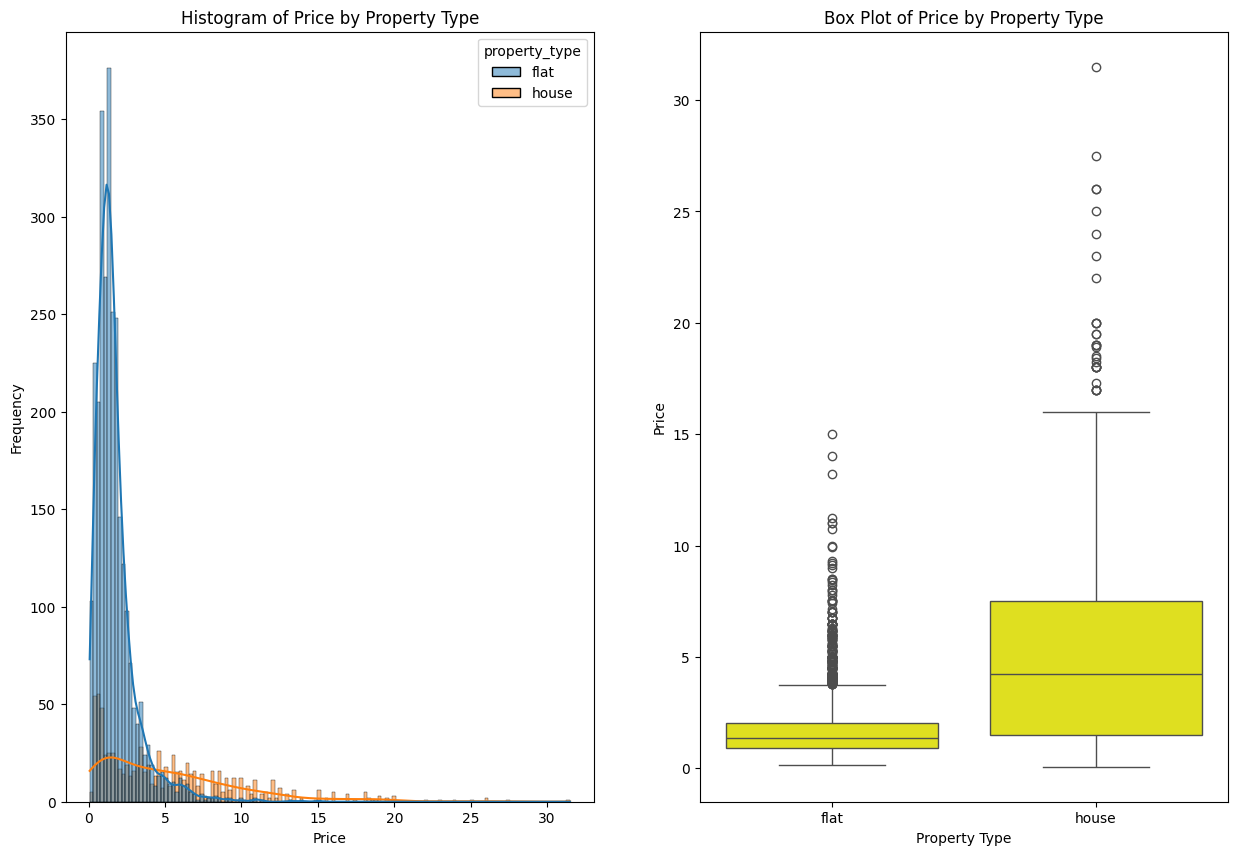

In [101]:
# Multivarient analysis
# property_type vs price
plt.figure(figsize=(15, 10))

# Histogram of Price by Property Type
plt.subplot(1, 2, 1)
sns.histplot(data=updData, x='price', hue='property_type', kde=True)
plt.title('Histogram of Price by Property Type')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Box plot of Price by Property Type
plt.subplot(1, 2, 2)
sns.boxplot(data=updData, x='property_type', y='price',color='yellow')
plt.title('Box Plot of Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')

plt.show()

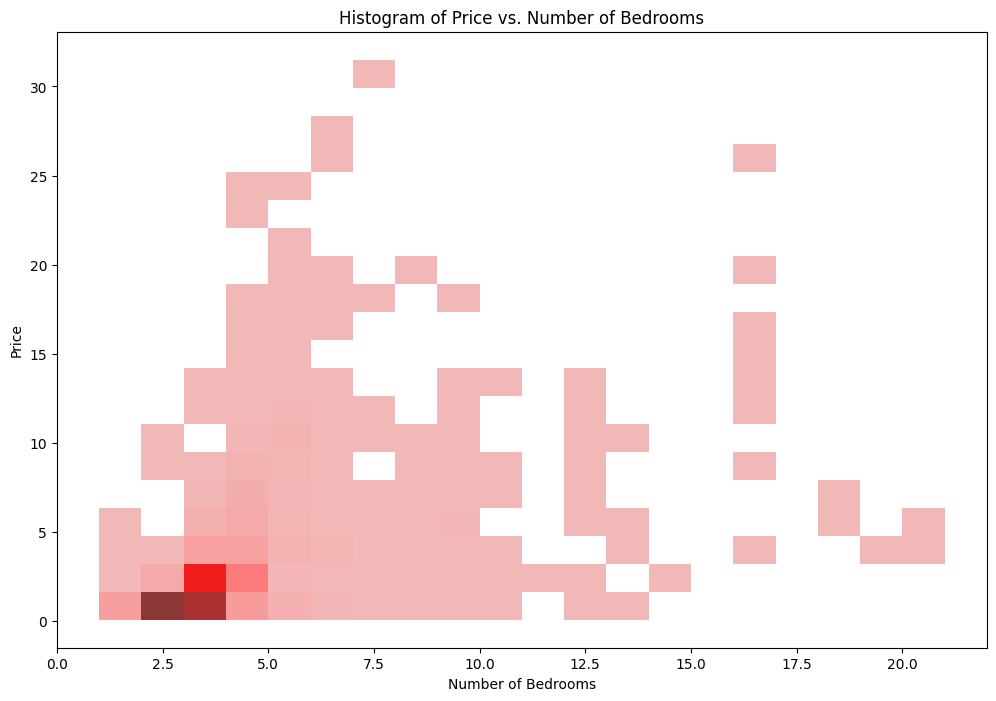

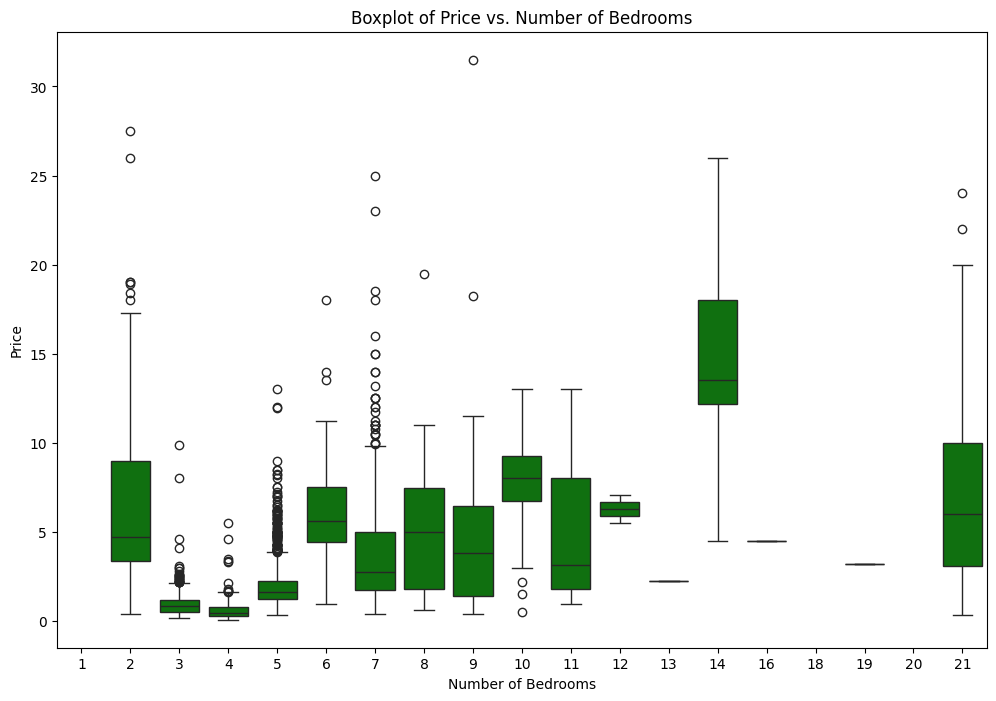

In [102]:
# Histogram of Price vs. Number of Bedrooms
plt.figure(figsize=(12, 8))
sns.histplot(data=updData, x='bedRoom', y='price', bins=20,color='red')
plt.title('Histogram of Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()
# Boxplot of Price vs. Number of Bedrooms
plt.figure(figsize=(12, 8))
sns.boxplot(data=updData, x='bedRoom', y='price',color='green', positions=bedRoom_values)
plt.title('Boxplot of Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

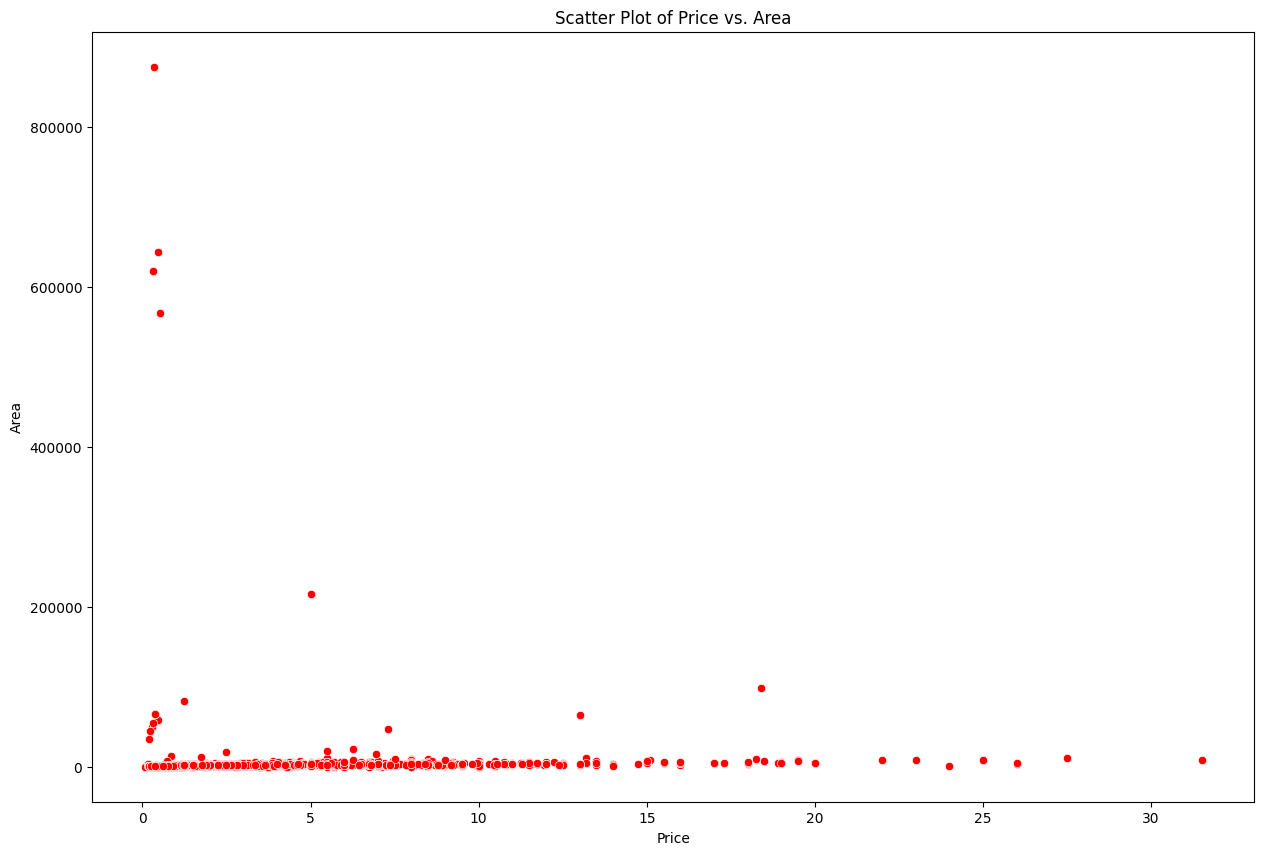

In [103]:
# Scatter Plot of Price vs. Area
plt.figure(figsize=(15, 10))
sns.scatterplot(data=updData, x='price', y='area',color = 'red')
plt.title('Scatter Plot of Price vs. Area')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

In [104]:
updData.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'price_bin', 'price_per_sqft_bin',
       'bathroom_bin', 'area_bin'],
      dtype='object')

In [105]:
# Analysing distribution of missing values
missing_values = updData.isnull().sum()

# Determining distribution across features
missing_distribution = (missing_values / len(updData)) * 100

# Creating a DataFrame to display missing value information
missing_data_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_distribution})
missing_data_info = missing_data_info[0 < missing_data_info['Missing Values']]

print("Missing Values Information:")
print(missing_data_info)
print('-------------------------------------x--------------------------------------')
print(missing_distribution.max())
print(missing_distribution.min())
print(missing_distribution.mean())

Missing Values Information:
                     Missing Values  Percentage
society                           1    0.027196
price                            17    0.462333
price_per_sqft                   17    0.462333
area                             17    0.462333
floorNum                         19    0.516726
facing                         1045   28.419908
super_built_up_area            1802   49.007343
built_up_area                  1987   54.038618
carpet_area                    1805   49.088931
price_bin                        17    0.462333
price_per_sqft_bin               17    0.462333
area_bin                         17    0.462333
-------------------------------------x--------------------------------------
54.038618438944795
0.0
6.810100826962398


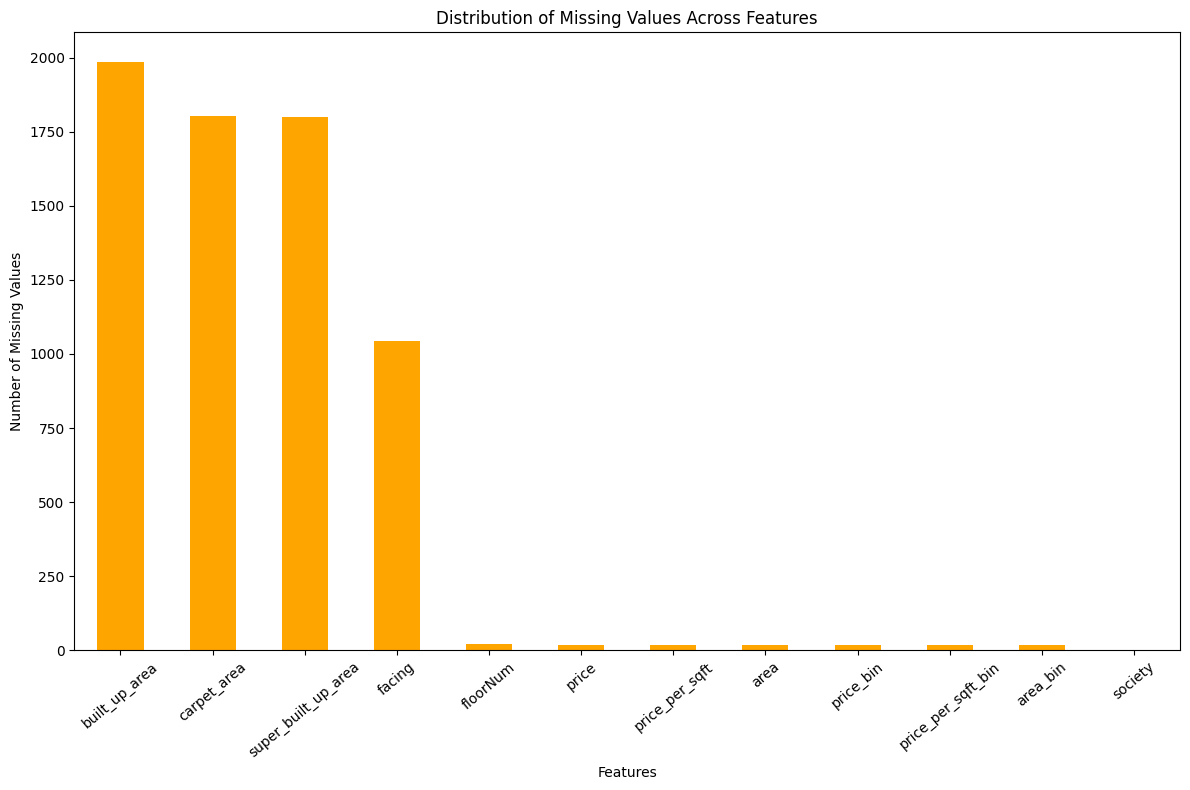

In [106]:
# Sort missing values in descending order
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plotting the distribution of missing values
plt.figure(figsize=(12, 8))
missing_values.plot(kind='bar',color='orange')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Distribution of Missing Values Across Features')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

Task **2**

In [107]:
# Missing value treatment for numeric features
#checking for numeric features
numeric_columns = updData.select_dtypes(include=['number'])
print(numeric_columns)
print(numeric_columns.columns.tolist())

      price  price_per_sqft     area  bedRoom  bathroom  floorNum  \
0      0.82          7585.0   1081.0        3         2       2.0   
1      0.95          8600.0   1105.0        2         2       4.0   
2      0.46            79.0  58228.0        2         2       0.0   
3      0.32          5470.0    585.0        2         2      17.0   
4      1.60          8020.0   1995.0        3         4      10.0   
...     ...             ...      ...      ...       ...       ...   
3798   0.37          6346.0    583.0        2         2       5.0   
3799   6.00          9634.0   6228.0        5         5       2.0   
3800   0.60          8163.0    735.0        1         1       5.0   
3801  15.50         28233.0   5490.0        5         6       3.0   
3802   1.78          9128.0   1950.0        3         3      27.0   

      super_built_up_area  built_up_area  carpet_area  study room  \
0                  1081.0            NaN        650.0           0   
1                     NaN        

In [108]:
# Replacing missing values with median
imp_data = numeric_columns.fillna(numeric_columns.median())
print(imp_data)

      price  price_per_sqft     area  bedRoom  bathroom  floorNum  \
0      0.82          7585.0   1081.0        3         2       2.0   
1      0.95          8600.0   1105.0        2         2       4.0   
2      0.46            79.0  58228.0        2         2       0.0   
3      0.32          5470.0    585.0        2         2      17.0   
4      1.60          8020.0   1995.0        3         4      10.0   
...     ...             ...      ...      ...       ...       ...   
3798   0.37          6346.0    583.0        2         2       5.0   
3799   6.00          9634.0   6228.0        5         5       2.0   
3800   0.60          8163.0    735.0        1         1       5.0   
3801  15.50         28233.0   5490.0        5         6       3.0   
3802   1.78          9128.0   1950.0        3         3      27.0   

      super_built_up_area  built_up_area  carpet_area  study room  \
0                  1081.0         1650.0        650.0           0   
1                  1828.0        

In [109]:
# verification of numeric data on new data
imp_data.isnull().sum()

price                  0
price_per_sqft         0
area                   0
bedRoom                0
bathroom               0
floorNum               0
super_built_up_area    0
built_up_area          0
carpet_area            0
study room             0
servant room           0
store room             0
pooja room             0
others                 0
furnishing_type        0
luxury_score           0
dtype: int64

In [110]:
# Missing value treatment for object features
# checking for object features
cat_col = updData.select_dtypes(include=['object'])
print(cat_col)
print(cat_col.columns.tolist())

     property_type                              society      sector  \
0             flat              signature global park 4   sector 36   
1             flat                     smart world gems   sector 89   
2             flat                        pyramid elite   sector 86   
3             flat               breez global hill view  sohna road   
4             flat          bestech park view sanskruti   sector 92   
...            ...                                  ...         ...   
3798          flat                       pivotal devaan   sector 84   
3799         house  international city by sobha phase 1  sector 109   
3800          flat           ansal api celebrity suites    sector 2   
3801         house                          independent   sector 43   
3802          flat                           m3m ikonic   sector 68   

                                           areaWithType balcony      facing  \
0     Super Built up area 1081(100.43 sq.m.)Carpet a...       2     

In [111]:
cat_col.head()

,property_type,society,sector,areaWithType,balcony,facing,agePossession
0,flat,signature global park 4,sector 36,Super Built up area 1081(100.43 sq.m.)Carpet a...,2,NaN,New Property
1,flat,smart world gems,sector 89,Carpet area: 1103 (102.47 sq.m.),2,NaN,New Property
2,flat,pyramid elite,sector 86,Carpet area: 58141 (5401.48 sq.m.),1,NaN,Under Construction
3,flat,breez global hill view,sohna road,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,1,NaN,New Property
4,flat,bestech park view sanskruti,sector 92,Super Built up area 1995(185.34 sq.m.)Built Up...,3+,North-West,Relatively New


In [112]:
#to count the number of missing values in the cat_col
cat_col.isnull().sum()

property_type       0
society             1
sector              0
areaWithType        0
balcony             0
facing           1045
agePossession       0
dtype: int64

In [113]:
# missing values for society &facing columns
cat_col['society'].fillna('Unknown', inplace=True)
cat_col['facing'].fillna('Unknown', inplace=True)

cat_col.head()

,property_type,society,sector,areaWithType,balcony,facing,agePossession
0,flat,signature global park 4,sector 36,Super Built up area 1081(100.43 sq.m.)Carpet a...,2,Unknown,New Property
1,flat,smart world gems,sector 89,Carpet area: 1103 (102.47 sq.m.),2,Unknown,New Property
2,flat,pyramid elite,sector 86,Carpet area: 58141 (5401.48 sq.m.),1,Unknown,Under Construction
3,flat,breez global hill view,sohna road,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,1,Unknown,New Property
4,flat,bestech park view sanskruti,sector 92,Super Built up area 1995(185.34 sq.m.)Built Up...,3+,North-West,Relatively New


**Task 3**

In [114]:
(updData)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,servant room,store room,pooja room,others,furnishing_type,luxury_score,price_bin,price_per_sqft_bin,bathroom_bin,area_bin
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,0,0,0,0,0,8,"(0.649, 0.84]","(6985.0, 7635.0]","(0.999, 2.0]","(800.0, 1093.4]"
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,1,0,0,0,0,38,"(0.84, 0.97]","(8204.6, 8731.6]","(0.999, 2.0]","(1093.4, 1265.733]"
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,0,0,0,0,0,15,"(0.41, 0.649]","(3.999, 4976.867]","(0.999, 2.0]","(3600.0, 875000.0]"
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,0,0,0,0,0,49,"(0.069, 0.41]","(4976.867, 5825.0]","(0.999, 2.0]","(559.867, 800.0]"
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1,0,0,1,1,174,"(1.445, 1.63]","(7635.0, 8204.6]","(3.0, 4.0]","(1930.0, 2040.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,flat,pivotal devaan,sector 84,0.37,6346.0,583.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2,2,1,...,0,0,0,0,0,73,"(0.069, 0.41]","(5825.0, 6440.6]","(0.999, 2.0]","(559.867, 800.0]"
3799,house,international city by sobha phase 1,sector 109,6.00,9634.0,6228.0,Plot area 692(578.6 sq.m.),5,5,3+,...,1,1,1,0,0,160,"(4.75, 7.35]","(9455.267, 10428.0]","(4.0, 5.0]","(3600.0, 875000.0]"
3800,flat,ansal api celebrity suites,sector 2,0.60,8163.0,735.0,Super Built up area 735(68.28 sq.m.),1,1,1,...,0,0,0,0,1,67,"(0.41, 0.649]","(7635.0, 8204.6]","(0.999, 2.0]","(559.867, 800.0]"
3801,house,independent,sector 43,15.50,28233.0,5490.0,Plot area 610(510.04 sq.m.),5,6,3,...,1,1,1,0,0,76,"(7.35, 31.5]","(20074.267, 29629.067]","(5.0, 6.0]","(3600.0, 875000.0]"


In [115]:
#imports required
from scipy.stats import zscore
from scipy import stats
# Z score method
# choosing numerical columns
numerical_columns = imp_data.select_dtypes(include=['number']).columns
# Calculating z-scores for each numerical column
z_scores = imp_data[numerical_columns].apply(zscore)
print('Z_scores')
print(z_scores)

Z_scores
         price  price_per_sqft      area   bedRoom  bathroom  floorNum  \
0    -0.574617       -0.271431 -0.077972 -0.189776 -0.731353 -0.798497   
1    -0.530907       -0.227597 -0.076933 -0.716821 -0.731353 -0.465023   
2    -0.695662       -0.595587  2.394762 -0.716821 -0.731353 -1.131971   
3    -0.742735       -0.362770 -0.099433 -0.716821 -0.731353  1.702559   
4    -0.312354       -0.252645 -0.038423 -0.189776  0.295445  0.535400   
...        ...             ...       ...       ...       ...       ...   
3798 -0.725923       -0.324939 -0.099520 -0.716821 -0.731353 -0.298286   
3799  1.167078       -0.182943  0.144738  0.864314  0.808844 -0.798497   
3800 -0.648589       -0.246470 -0.092943 -1.243867 -1.244751 -0.298286   
3801  4.361306        0.620277  0.112805  0.864314  1.322243 -0.631760   
3802 -0.251832       -0.204795 -0.040370 -0.189776 -0.217954  3.369930   

      super_built_up_area  built_up_area  carpet_area  study room  \
0               -1.454405      -0

In [116]:
# Using IQR method
# to store outliers
outliers = pd.DataFrame(columns=numerical_columns)


for col in numerical_columns:
    # Calculating quartiles
    Q1 = imp_data[col].quantile(0.25)
    Q3 = imp_data[col].quantile(0.75)

    # Calculating IQR
    IQR = Q3 - Q1

    # Defining lower and upper bounds
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identifying outliers
    is_outlier = ~((imp_data[col] >= lower_bound) & (imp_data[col] <= upper_bound))
    outliers[col] = is_outlier

print(outliers)

      price  price_per_sqft   area  bedRoom  bathroom  floorNum  \
0     False           False  False    False     False     False   
1     False           False  False    False     False     False   
2     False           False   True    False     False     False   
3     False           False  False    False     False     False   
4     False           False  False    False     False     False   
...     ...             ...    ...      ...       ...       ...   
3798  False           False  False    False     False     False   
3799   True           False   True    False     False     False   
3800  False           False  False    False     False     False   
3801   True            True   True    False     False     False   
3802  False           False  False    False     False      True   

      super_built_up_area  built_up_area  carpet_area  study room  \
0                    True          False         True       False   
1                   False          False         True    

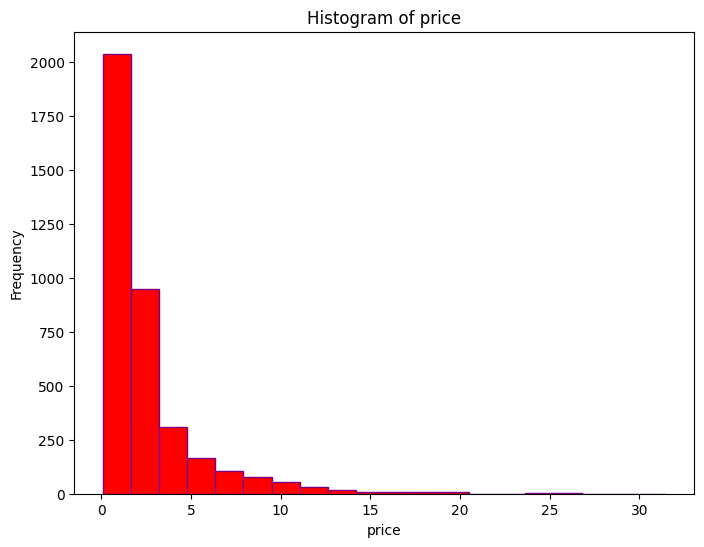

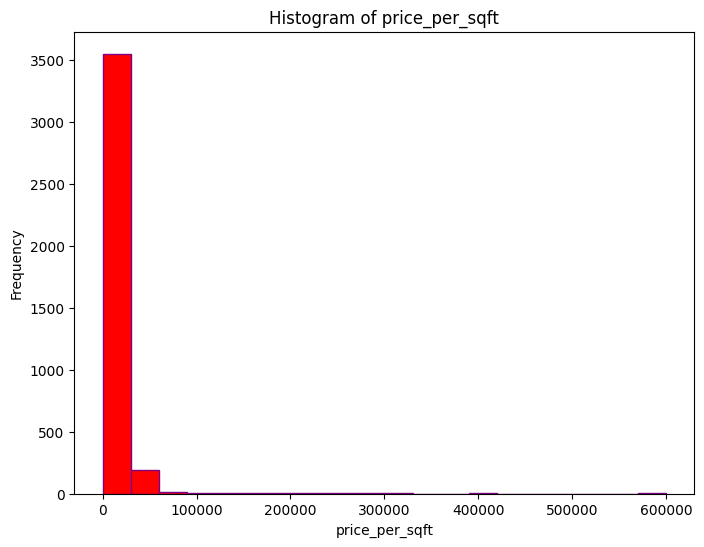

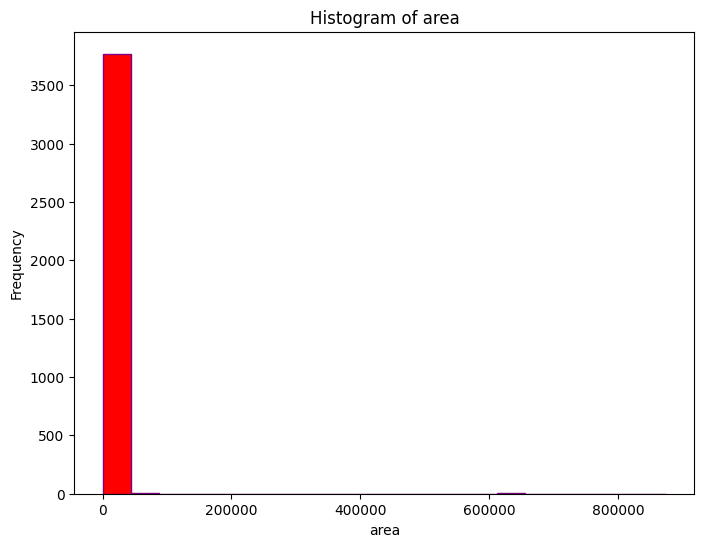

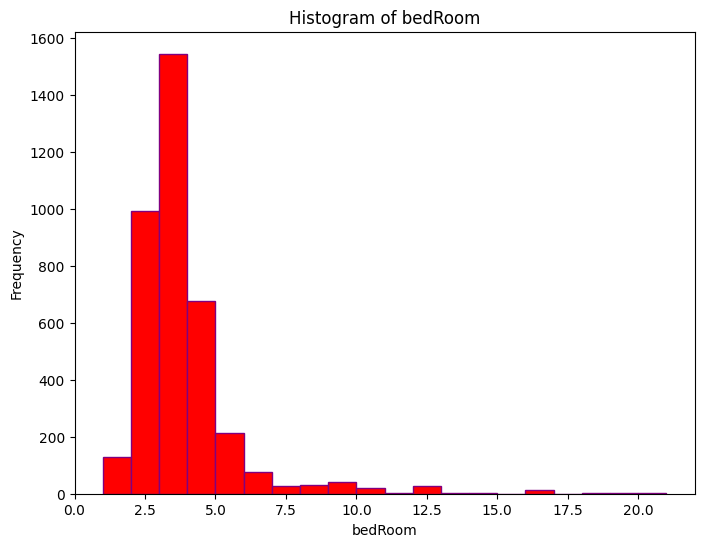

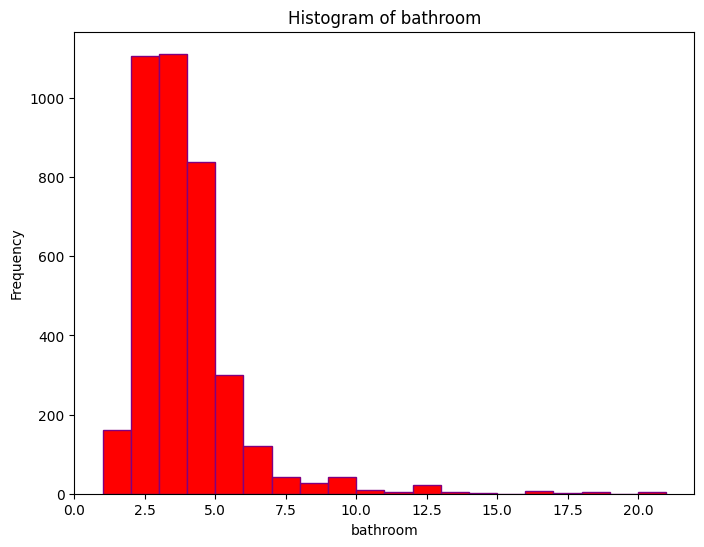

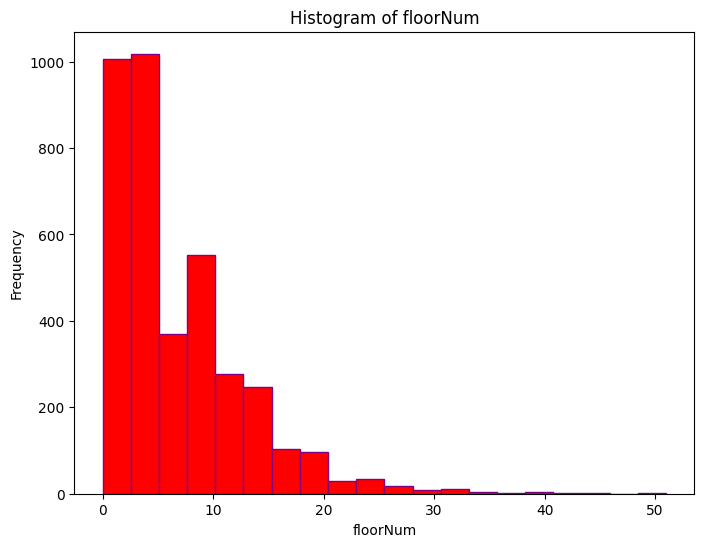

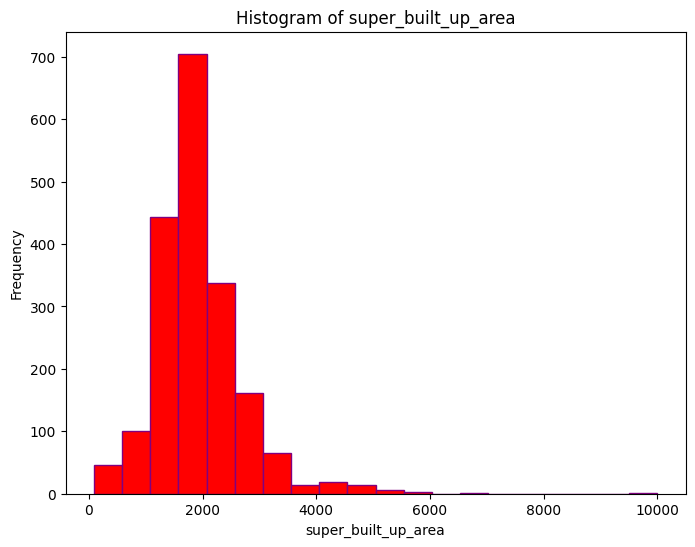

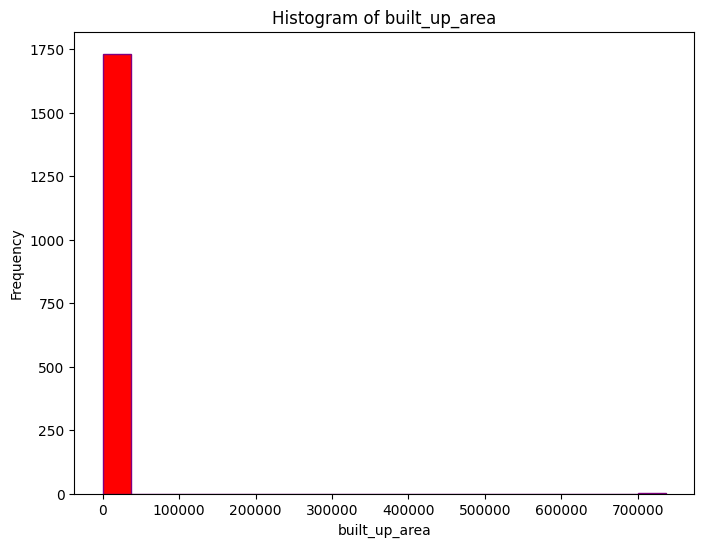

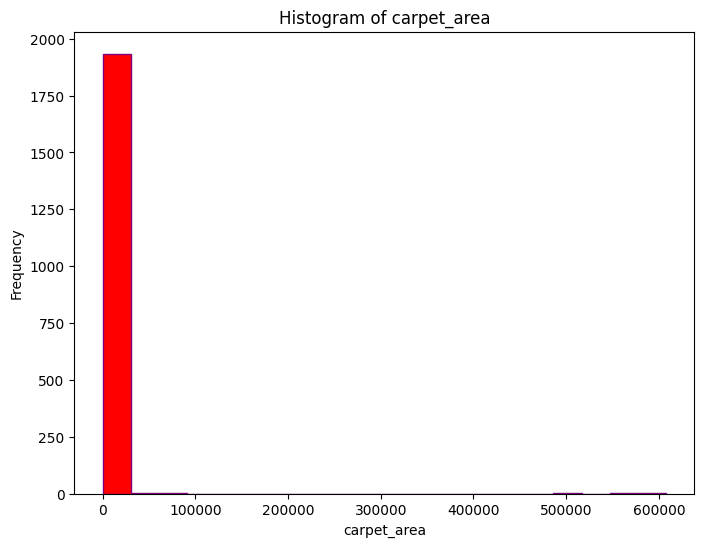

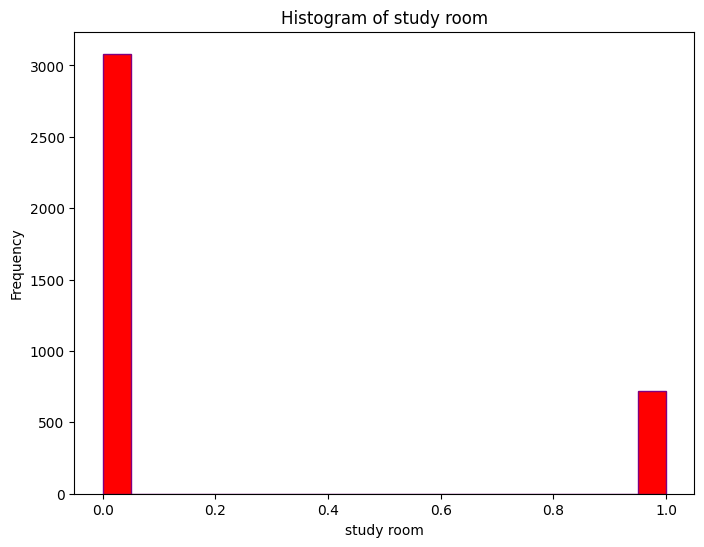

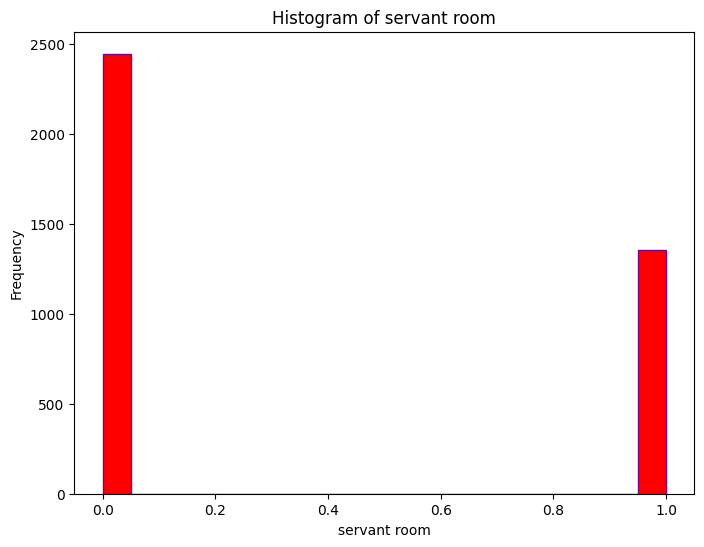

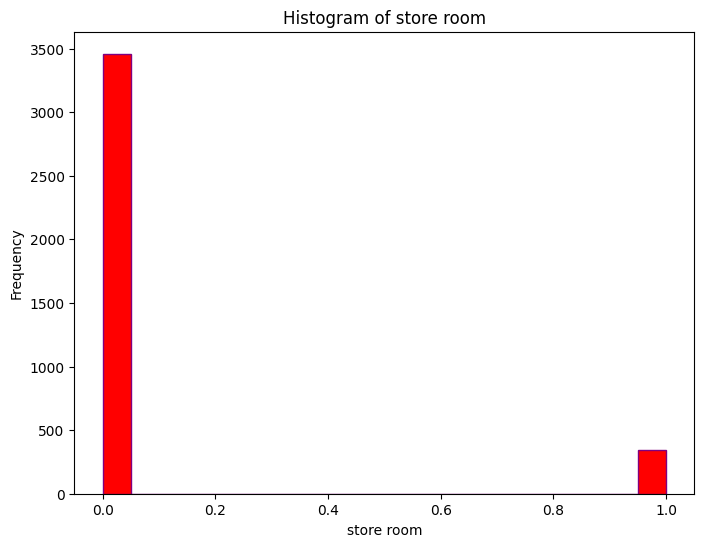

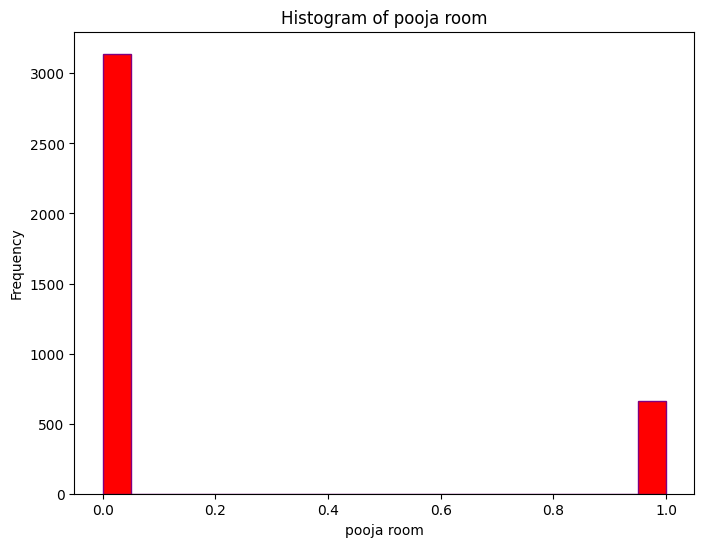

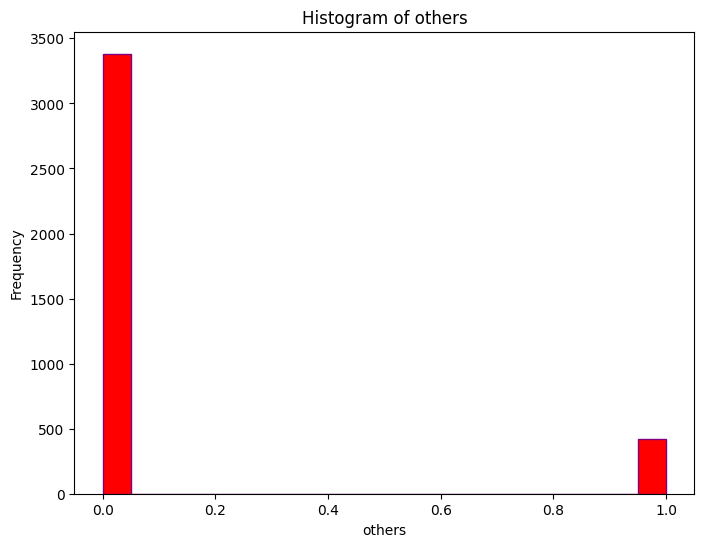

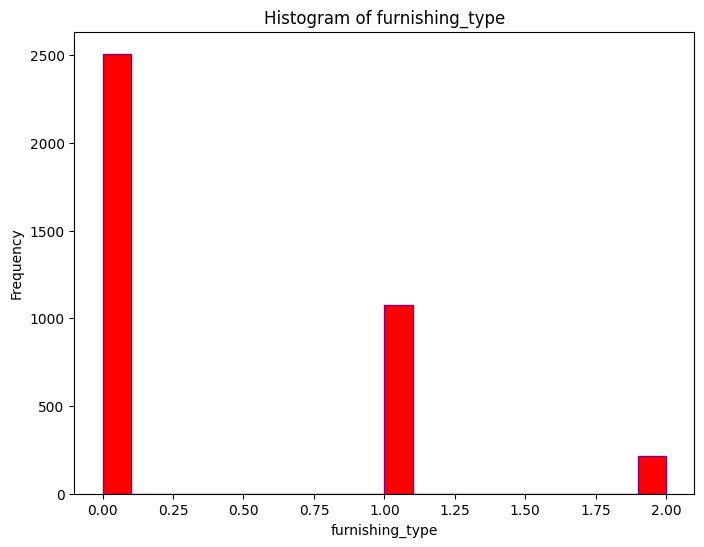

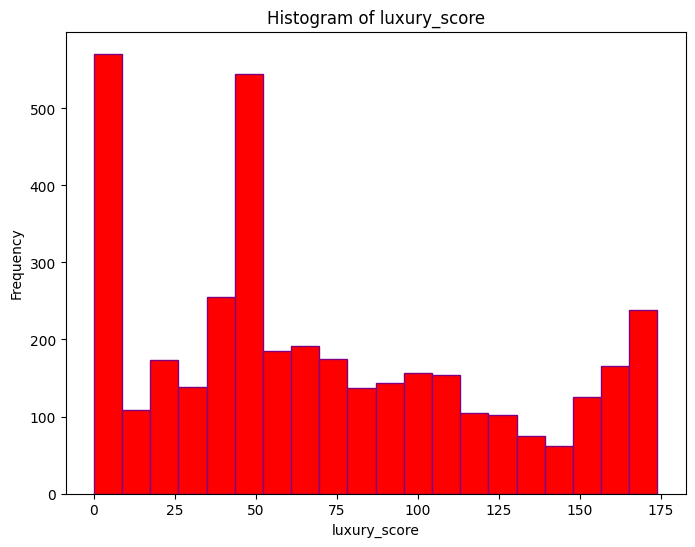

In [117]:
statistics = data[numerical_columns].describe()
# Plotting histograms for numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[col], bins=20, edgecolor='purple',color='red')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


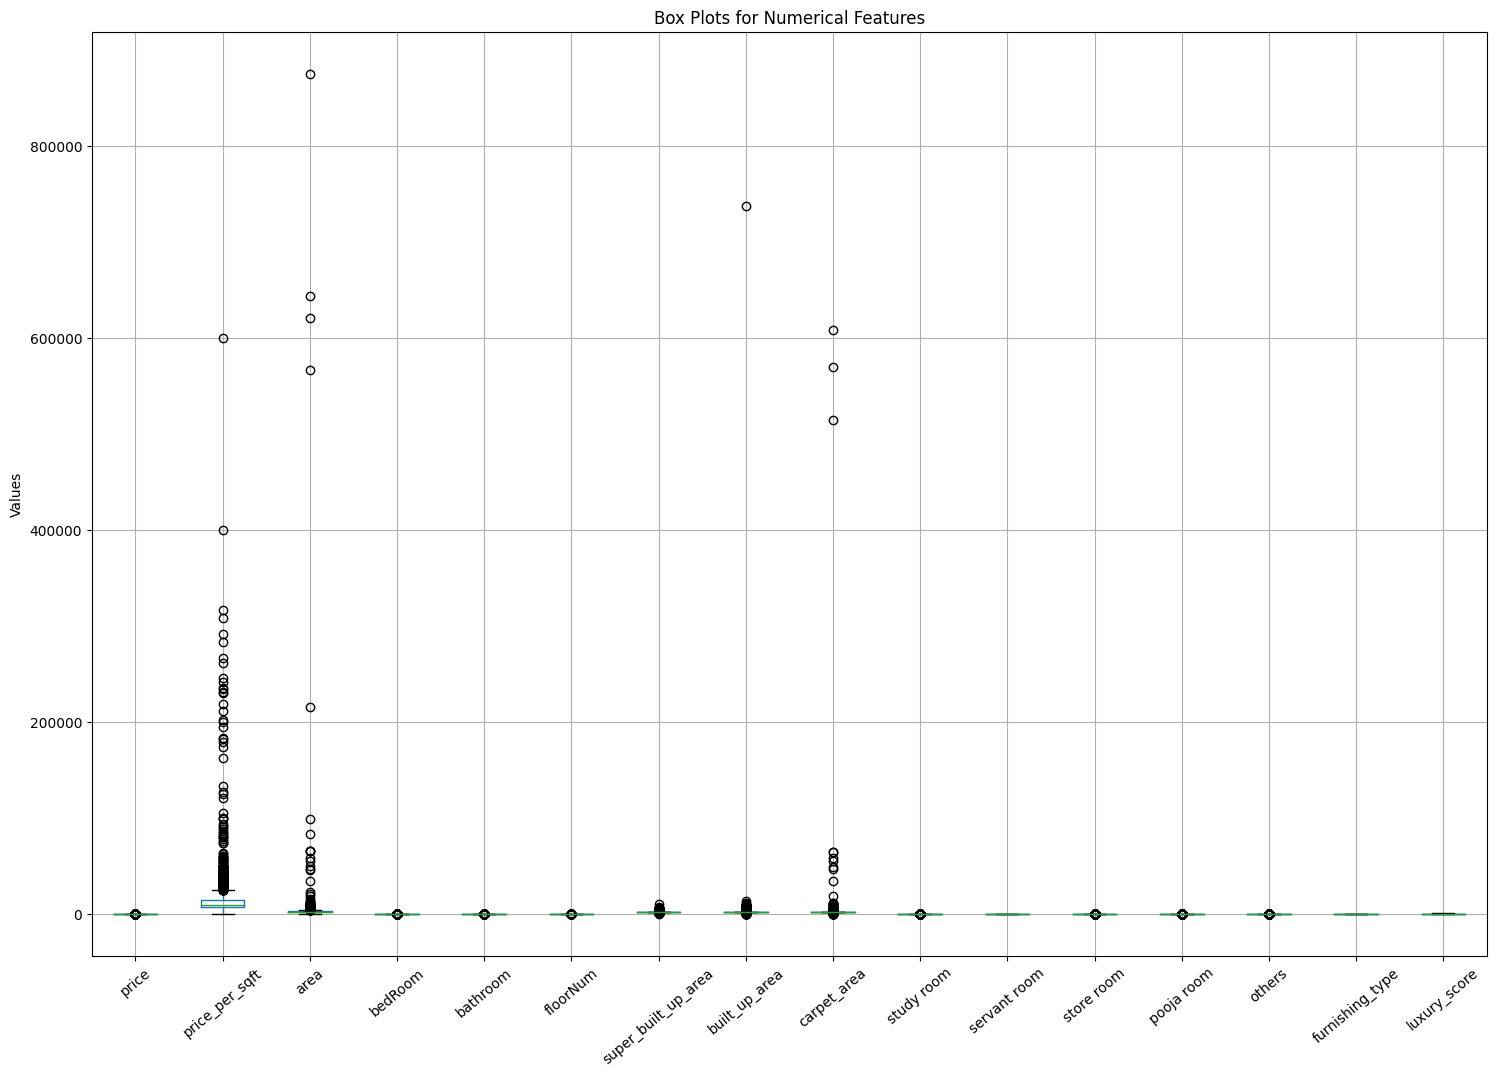

In [118]:
#Box Plots for Numerical Features
imp_data[numerical_columns].boxplot(figsize=(18, 12))
plt.title('Box Plots for Numerical Features')
plt.ylabel('Values')
plt.xticks(rotation=40)
plt.show()

In [119]:
# Displaying descriptive statistics
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
             price  price_per_sqft           area      bedRoom     bathroom  \
count  3785.000000     3785.000000    3785.000000  3803.000000  3803.000000   
mean      2.505804    13800.167768    2845.999472     3.338154     3.405469   
std       2.950121    23052.005585   22783.349053     1.876734     1.930456   
min       0.070000        4.000000      50.000000     1.000000     1.000000   
25%       0.940000     6808.000000    1220.000000     2.000000     2.000000   
50%       1.500000     9000.000000    1725.000000     3.000000     3.000000   
75%       2.700000    13765.000000    2295.000000     4.000000     4.000000   
max      31.500000   600000.000000  875000.000000    21.000000    21.000000   

          floorNum  super_built_up_area  built_up_area    carpet_area  \
count  3784.000000          1915.000000    1733.000000    1944.000000   
mean      6.810254          1921.658251    2360.241413    2483.466943   
std       6.027555           767.160169   177

**Task 4**

In [120]:
# Outlier handeling
# using Winsorization
def winsorize(data, capping_percentile=90):
    data_cap = np.percentile(data, capping_percentile)
    return np.where(data > data_cap, data_cap, data)
winsorized = winsorize(imp_data[numerical_columns])
print("Original data:", imp_data)
print("Winsorized data:", winsorized)

Original data:       price  price_per_sqft     area  bedRoom  bathroom  floorNum  \
0      0.82          7585.0   1081.0        3         2       2.0   
1      0.95          8600.0   1105.0        2         2       4.0   
2      0.46            79.0  58228.0        2         2       0.0   
3      0.32          5470.0    585.0        2         2      17.0   
4      1.60          8020.0   1995.0        3         4      10.0   
...     ...             ...      ...      ...       ...       ...   
3798   0.37          6346.0    583.0        2         2       5.0   
3799   6.00          9634.0   6228.0        5         5       2.0   
3800   0.60          8163.0    735.0        1         1       5.0   
3801  15.50         28233.0   5490.0        5         6       3.0   
3802   1.78          9128.0   1950.0        3         3      27.0   

      super_built_up_area  built_up_area  carpet_area  study room  \
0                  1081.0         1650.0        650.0           0   
1                 

In [121]:
# using trimming
def trim(data, trim_percentage=0.05):
    trim_amount = int(len(data) * trim_percentage)
    return np.sort(data)[trim_amount:-trim_amount]
trimmed = trim(imp_data)
print("Original data:", imp_data)
print("Trimmed data:", trimmed)

Original data:       price  price_per_sqft     area  bedRoom  bathroom  floorNum  \
0      0.82          7585.0   1081.0        3         2       2.0   
1      0.95          8600.0   1105.0        2         2       4.0   
2      0.46            79.0  58228.0        2         2       0.0   
3      0.32          5470.0    585.0        2         2      17.0   
4      1.60          8020.0   1995.0        3         4      10.0   
...     ...             ...      ...      ...       ...       ...   
3798   0.37          6346.0    583.0        2         2       5.0   
3799   6.00          9634.0   6228.0        5         5       2.0   
3800   0.60          8163.0    735.0        1         1       5.0   
3801  15.50         28233.0   5490.0        5         6       3.0   
3802   1.78          9128.0   1950.0        3         3      27.0   

      super_built_up_area  built_up_area  carpet_area  study room  \
0                  1081.0         1650.0        650.0           0   
1                 

In [122]:
imp_data

,price,price_per_sqft,area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0.82,7585.0,1081.0,3,2,2.0,1081.0,1650.0,650.0,0,0,0,0,0,0,8
1,0.95,8600.0,1105.0,2,2,4.0,1828.0,1650.0,1103.0,1,1,0,0,0,0,38
2,0.46,79.0,58228.0,2,2,0.0,1828.0,1650.0,58141.0,0,0,0,0,0,0,15
3,0.32,5470.0,585.0,2,2,17.0,1828.0,1000.0,585.0,0,0,0,0,0,0,49
4,1.60,8020.0,1995.0,3,4,10.0,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,0.37,6346.0,583.0,2,2,5.0,583.0,1650.0,483.0,0,0,0,0,0,0,73
3799,6.00,9634.0,6228.0,5,5,2.0,1828.0,6228.0,1300.0,1,1,1,1,0,0,160
3800,0.60,8163.0,735.0,1,1,5.0,735.0,1650.0,1300.0,0,0,0,0,0,1,67
3801,15.50,28233.0,5490.0,5,6,3.0,1828.0,5490.0,1300.0,1,1,1,1,0,0,76


In [123]:
cat_col

,property_type,society,sector,areaWithType,balcony,facing,agePossession
0,flat,signature global park 4,sector 36,Super Built up area 1081(100.43 sq.m.)Carpet a...,2,Unknown,New Property
1,flat,smart world gems,sector 89,Carpet area: 1103 (102.47 sq.m.),2,Unknown,New Property
2,flat,pyramid elite,sector 86,Carpet area: 58141 (5401.48 sq.m.),1,Unknown,Under Construction
3,flat,breez global hill view,sohna road,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,1,Unknown,New Property
4,flat,bestech park view sanskruti,sector 92,Super Built up area 1995(185.34 sq.m.)Built Up...,3+,North-West,Relatively New
...,...,...,...,...,...,...,...
3798,flat,pivotal devaan,sector 84,Super Built up area 583(54.16 sq.m.)Carpet are...,1,North-West,Relatively New
3799,house,international city by sobha phase 1,sector 109,Plot area 692(578.6 sq.m.),3+,South-West,Relatively New
3800,flat,ansal api celebrity suites,sector 2,Super Built up area 735(68.28 sq.m.),1,North-East,Moderately Old
3801,house,independent,sector 43,Plot area 610(510.04 sq.m.),3,East,Moderately Old


In [124]:
# Merging cat_col and imputed_data
final_data = pd.merge(imp_data, cat_col, left_index=True, right_index=True)

# Printing the merged data
final_data.head()

,price,price_per_sqft,area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,...,others,furnishing_type,luxury_score,property_type,society,sector,areaWithType,balcony,facing,agePossession
0,0.82,7585.0,1081.0,3,2,2.0,1081.0,1650.0,650.0,0,...,0,0,8,flat,signature global park 4,sector 36,Super Built up area 1081(100.43 sq.m.)Carpet a...,2,Unknown,New Property
1,0.95,8600.0,1105.0,2,2,4.0,1828.0,1650.0,1103.0,1,...,0,0,38,flat,smart world gems,sector 89,Carpet area: 1103 (102.47 sq.m.),2,Unknown,New Property
2,0.46,79.0,58228.0,2,2,0.0,1828.0,1650.0,58141.0,0,...,0,0,15,flat,pyramid elite,sector 86,Carpet area: 58141 (5401.48 sq.m.),1,Unknown,Under Construction
3,0.32,5470.0,585.0,2,2,17.0,1828.0,1000.0,585.0,0,...,0,0,49,flat,breez global hill view,sohna road,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,1,Unknown,New Property
4,1.60,8020.0,1995.0,3,4,10.0,1995.0,1615.0,1476.0,0,...,1,1,174,flat,bestech park view sanskruti,sector 92,Super Built up area 1995(185.34 sq.m.)Built Up...,3+,North-West,Relatively New


In [125]:
#final checking
final_data.isnull().sum()

price                  0
price_per_sqft         0
area                   0
bedRoom                0
bathroom               0
floorNum               0
super_built_up_area    0
built_up_area          0
carpet_area            0
study room             0
servant room           0
store room             0
pooja room             0
others                 0
furnishing_type        0
luxury_score           0
property_type          0
society                0
sector                 0
areaWithType           0
balcony                0
facing                 0
agePossession          0
dtype: int64

**Machine Learning model**

In [126]:
#imports
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [127]:
# Dataset separation
y = final_data['price']
X = final_data.drop('price', axis=1)

In [128]:
print(X.shape)
print(y.shape)

(3677, 22)
(3677,)


In [129]:
# numerical feature selection
# Calculating the correlation matrix
correlation_matrix = imp_data.corr()

# Displaying the correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)

# Extracting correlation with the target
correlation_with_target = correlation_matrix["price"].drop("price")

print('\n')
print('------------------------------x--------------------------------------')
# Displaying the correlations with the target
print("\nCorrelations with target:\n", correlation_with_target)


Correlation Matrix:
                         price  price_per_sqft      area   bedRoom  bathroom  \
price                1.000000        0.391509  0.019707  0.514657  0.580660   
price_per_sqft       0.391509        1.000000 -0.027462  0.309346  0.290193   
area                 0.019707       -0.027462  1.000000  0.005430  0.006790   
bedRoom              0.514657        0.309346  0.005430  1.000000  0.908884   
bathroom             0.580660        0.290193  0.006790  0.908884  1.000000   
floorNum            -0.093982       -0.110905 -0.015590 -0.131269 -0.069063   
super_built_up_area  0.209676        0.014714  0.019232  0.174059  0.257705   
built_up_area        0.029947       -0.013285  0.622552  0.008065  0.012275   
carpet_area         -0.013687       -0.020651  0.758523 -0.017653 -0.015761   
study room           0.256221        0.094792  0.017168  0.137322  0.161984   
servant room         0.399241        0.102571  0.000703  0.278657  0.411667   
store room           0.307306 

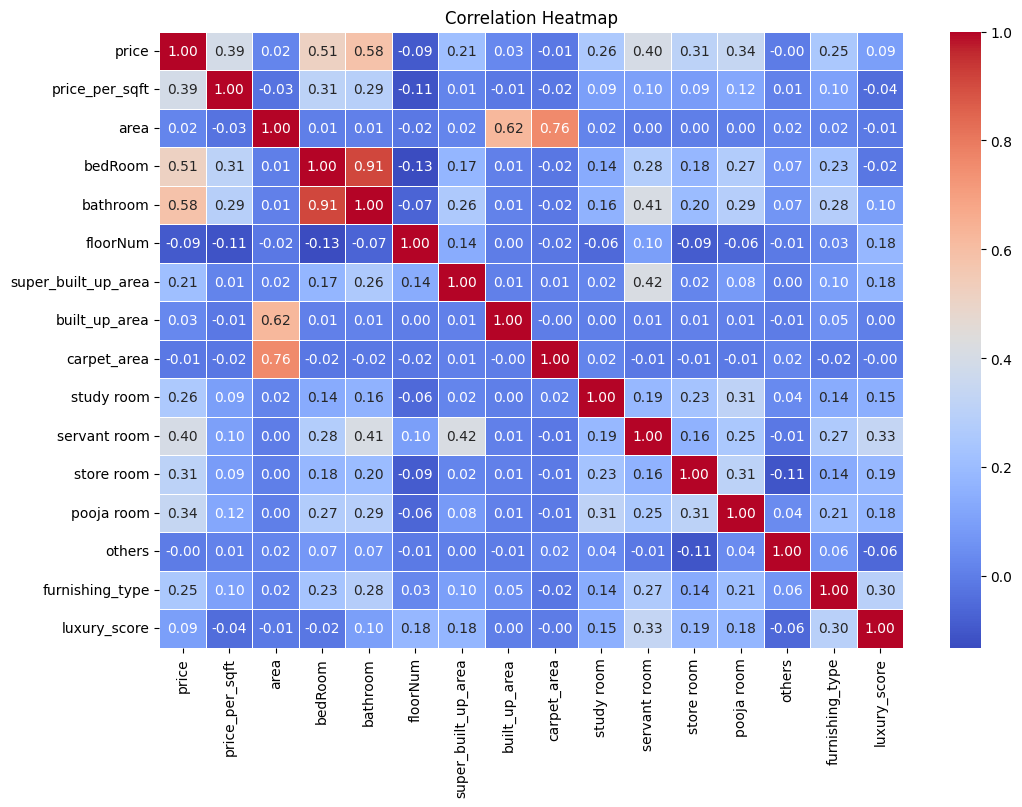

In [130]:
#plotting correlation graph
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.7)
plt.title('Correlation Heatmap')
plt.show()

In [131]:
# price_per_sqft, bedRoom, bathroom, floorNum, servant room, others- these are the features which are selected manually.

In [132]:
# Random forest feature selection
from sklearn.ensemble import RandomForestRegressor

In [133]:
# Encoding categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [134]:
# Fitting Random Forest model
RanFOR = RandomForestRegressor(n_estimators=150, random_state=40)
RanFOR.fit(X, y)

RandomForestRegressor(n_estimators=150, random_state=40)

In [135]:
# Extracting feature importances
Imp_feaures = RanFOR.feature_importances_
features = X.columns
Imp_feaures

array([5.77322394e-01, 3.92079629e-01, 1.11071024e-03, 4.06773062e-03,
       8.37493959e-04, 7.45843907e-05, 3.67631970e-03, 4.52614190e-03,
       1.62507019e-04, 7.35864754e-04, 2.14328950e-04, 2.93382035e-04,
       4.87358521e-04, 4.82323506e-04, 2.13762568e-03, 3.38182924e-04,
       2.24754512e-03, 2.78712508e-03, 4.13341425e-03, 5.11366049e-04,
       1.02495211e-03, 7.49021074e-04])

In [136]:
# Creating a DataFrame for feature importances
importance_data = pd.DataFrame({
    'Feature': features,
    'Importance': Imp_feaures
})

In [137]:
#important features to the model's predictions.
importance_data

,Feature,Importance
0,price_per_sqft,0.577322
1,area,0.392080
2,bedRoom,0.001111
3,bathroom,0.004068
4,floorNum,0.000837
5,super_built_up_area,0.000075
6,built_up_area,0.003676
7,carpet_area,0.004526
8,study room,0.000163
9,servant room,0.000736


In [138]:
# Sorting the DataFrame by importance
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,price_per_sqft,0.577322
1,area,0.392080
7,carpet_area,0.004526
18,areaWithType,0.004133
3,bathroom,0.004068
6,built_up_area,0.003676
17,sector,0.002787
16,society,0.002248
14,luxury_score,0.002138
2,bedRoom,0.001111


In [139]:
#Features selected manually
X_new = X[['price_per_sqft','area','bathroom','sector','others']]

In [140]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=40)

In [141]:
print(X_new.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3677, 5)
(3677,)
(2757, 5)
(920, 5)
(2757,)
(920,)


In [142]:
# tarining the model
Trainmodel = LinearRegression()
Trainmodel.fit(X_train, y_train)

LinearRegression()

In [143]:
# Predicting on the test set
y_pred = Trainmodel.predict(X_test)

In [144]:
# Evaluating the model
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

In [145]:
#Mean squared error and R2 score values calculated
print(f"Mean Squared Error: {MSE}")
print(f"R^2 Score: {R2}")

Mean Squared Error: 4.751594137082522
R^2 Score: 0.4008210639987001


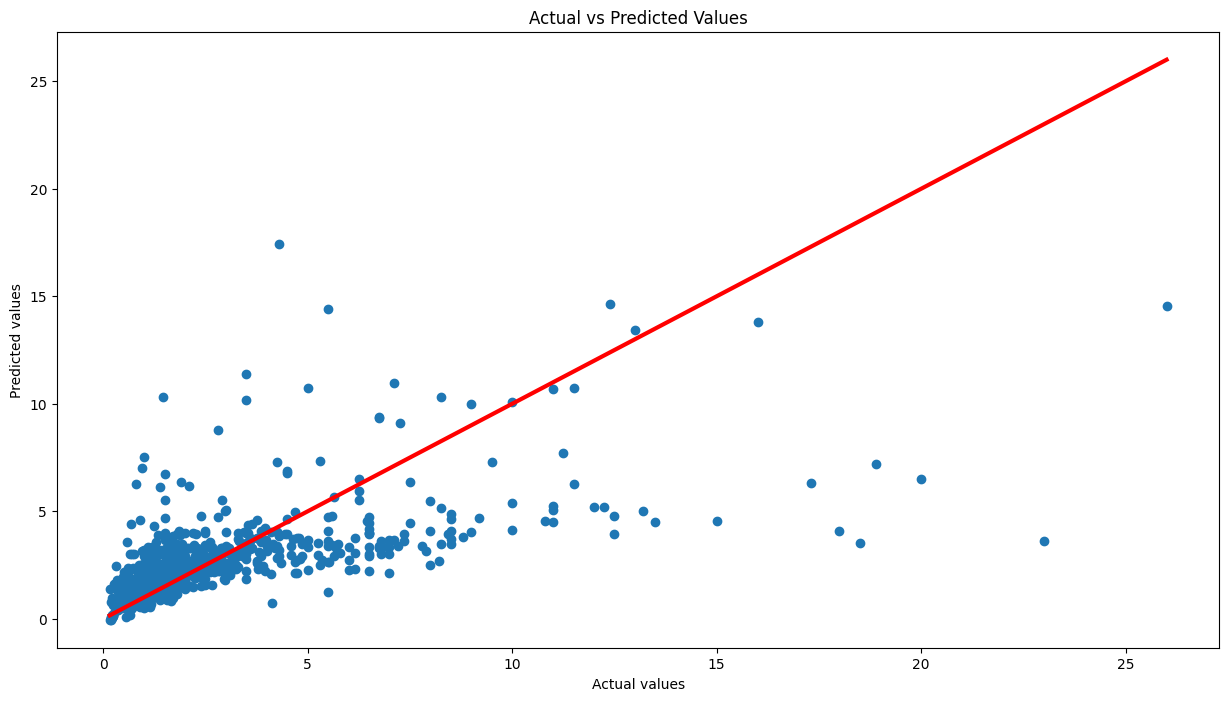

In [146]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(15, 8))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=3)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()